Let's start with the second algorithm today, which is Linear Regression.

<b> Linear Regression </b>

Linear Regression is a predictive algorithm which provides a Linear relationship between Prediction (Call it ‘Y’) and Input (Call is ‘X’). <br>
As we know from the basic maths that if we plot an ‘X’,’Y’ graph, a linear relationship will always come up with a straight line. For example, if we plot the graph of these values.
(Input) X = 1,2,3,4,5
(Prediction) Y = 1,2,3,4,5
It will be a perfectly straight line:

It is used to esimate real value (cost of houses, number of calls etc) based on continuous variable. Here, we establish relationship between independent and dependent variable by fitting a best line. <br>
The best fit line is known as regression line and is represented by :<br>
Y = a *X + b <br>
   - where Y is dependent variable <br>
   - a is slope <br>
   - X is independent variable <br>
   - b is intercept <br>

The coefficients a and b are derived based on minimizing the sum of squared difference of distance between data points and regression line.

<img src="https://static.wixstatic.com/media/02b811_fc93f61330d84649888709f7755c5dab~mv2.png/v1/fill/w_1000,h_626,al_c,usm_0.66_1.00_0.01/02b811_fc93f61330d84649888709f7755c5dab~mv2.png">

From the equation, when x = 0, then y = c

We generally minimise the distance between the predicted and input values to obtain the best line.<br>
Summation of all error (Cost function) should be minimum, that line will give us the required value of a and b.

Cost Function : 1/2m ∑ (hω (xi)-yi)^2 where summation goes from i=1 to m. 

The usage of the square becomes very important later on when we look at algorithms that find the best weight combinations. Algorithms such as Gradient Descent, the most commonly used optimisation algorithm, requires the performance function to be differentiable and this squared error function satisfies that requirement.

The equation of line in ML theory, we convert this into an estimation function using omega’s (ω) or theta’s (θ) , which represent our weights.

hθ(x) = θ0 + θ1x1 + θ2x2 + θ3x3 +…..+ θnxn <br>
Now, this equation can be manipulated based on the features you have in your dataset however if we have 2 features, so for our equation will look like : <br>
hθ(x) = θ0 + θ1x1 + θ2x2 <br>
where x1 and x2 are the two features

Here, weights are determined by the model, so they are intrinsic parameters. They can be thought of as our model assigning a “relevance figure” to each variable as to how much it relates to the output. The higher the weight, the more influence that feature has on the model output and the better descriptor it is for said output.

So now our main aim is to minimize the cost function, for that we need to find the best combination of weights. For this we have the method called <b> Gradient Descent </b>

Gradient Descent follows the following procedures :
- Start with some initial values for our weights θ0, θ1, …, θn
- We keep updating our weights to reduce our cost function J(θ0, θ1, …, θn)
- Stop when we have reached the minimum

The equation for gradient Descent is :

<img src ="https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png">

This above equation shows us exactly why we need our cost function to be differentiable. The algorithm we iterate over takes our current weight and subtracts from it the differentiated cost function multiplied by what is called a learning rate. The size of the learning rate will determine how quickly we converge to or diverge from the minimum value.


So since our cost function has a squared term, we know it takes the shape of a second order polynomial, so essentially a U-shape. By differentiating the cost function at each step of our gradient descent algorithm, we can find out the gradient of the point at which our cost function is at presently. Knowing that our optimal value, or the lowest possible cost value occurs at a gradient of 0, we now know which direction we need to travel in order to ensure we are consistently moving towards this value. At each iteration therefore, we move slightly closer to this combination of weights that return our minimum cost value.

<b>Now let's look at the significance of the learning rate.</b>

In gradient descent, during one iteration, we update all of our weights at the same time. <br>
The learning rate indicates how quickly we reach the minimum value. We want a learning rate that isn’t too low, because it will take a long time to find the optimal value. A learning rate too high however, and our function might diverge meaning that it will never actually reach the optimal value. We need to find a value that will converge at the correct rate.

<img src="https://miro.medium.com/max/1000/1*QG_Wj_dlXTYf6UQ8vvT78w.png">

Now let's take a dataset to understand this algorithm.

Here I have taken a very simple dataset which just has two columns - Height and Weight. <br>
This data set gives average masses for women as a function of their height in a sample of American women of age 30–39. <br>
The data contains the variables Height (m) and Weight (kg).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df.head(n=10)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [3]:
df.tail(n=10)

,Height,Weight
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


In [4]:
df.describe

<bound method NDFrame.describe of     Height  Weight
0     1.47   52.21
1     1.50   53.12
2     1.52   54.48
3     1.55   55.84
4     1.57   57.20
5     1.60   58.57
6     1.63   59.93
7     1.65   61.29
8     1.68   63.11
9     1.70   64.47
10    1.73   66.28
11    1.75   68.10
12    1.78   69.92
13    1.80   72.19
14    1.83   74.46>

In [5]:
X = df[['Height']]
y = df[['Weight']]

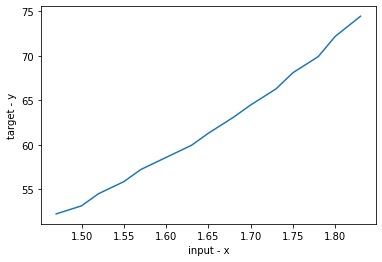

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df['Height'], df['Weight'])
ax.set_xlabel('input - x')
ax.set_ylabel('target - y')
plt.show()

In [7]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [8]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.57219091 0.86259489 0.99050514 0.97166823 0.96910794]


In [9]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [10]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [11]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  0.6382139505042559
R2 Score:  0.9795574502366999


Here, Mean Square Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values. <br>
Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model. <br>
It's formula is given by : <br>
<b>R2= 1- SS(res) / SS(tot)</b>
- where SS(res) is the sum of squares of the residual errors.
- SS(tot) is the total sum of the errors.

We completed our second algorithm today. <br>
Keep practising, download the datasets from kaggle and get started!<br>
In the next repository we will discuss about our next algorithm KNN (K-Nearest Neighbour)